# DBCV Experiments

### Import necessary packages

In [33]:
#%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
#if "DISCO_ROOT_FOLDER" in globals():
#    os.chdir(DISCO_ROOT_FOLDER)
 #   sys.path.append(DISCO_ROOT_FOLDER)

UsageError: Line magic function `%autoreload` not found.


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.Evaluation.dbcv import validity_index as DBCV
from tqdm import tqdm

### Load data

In [17]:
from datasets.density_datasets import Datasets as DensityDatasets
import numpy as np

X_complex8, l_complex8 = DensityDatasets.complex8.standardized_data_cached
X_complex9, l_complex9 = DensityDatasets.complex9.standardized_data_cached


In [18]:
def run_multiple_shuffle_runs(RUNS, X, l):
    shuffle_report= []
    np.random.seed(0)
    seeds = np.random.choice(10_000, size=RUNS, replace=False)
    for run in tqdm(range(RUNS)):
        np.random.seed(seeds[run])
        shuffle_data_index = np.random.choice(len(X), size=len(X), replace=False)
        X_ = X[shuffle_data_index]
        l_ = l[shuffle_data_index]
        dbcv_shuffle = DBCV(X_, l_,metric='sqeuclidean')
        shuffle_report.append(dbcv_shuffle)
    return shuffle_report

In [19]:
from src.utils.experiments import cache

n = 1000

dbcv_list_complex8 = cache(
    "dbcv_list_complex8", run_multiple_shuffle_runs, args=(n, X_complex8, l_complex8)
)
dbcv_list_complex9 = cache(
    "dbcv_list_complex9", run_multiple_shuffle_runs, args=(n, X_complex9, l_complex9)
)

In [20]:
dbcv_complex8 = pd.DataFrame(data = np.array(dbcv_list_complex8), columns = ['DBCV'])
dbcv_complex9 = pd.DataFrame(data = np.array(dbcv_list_complex9), columns = ['DBCV'])

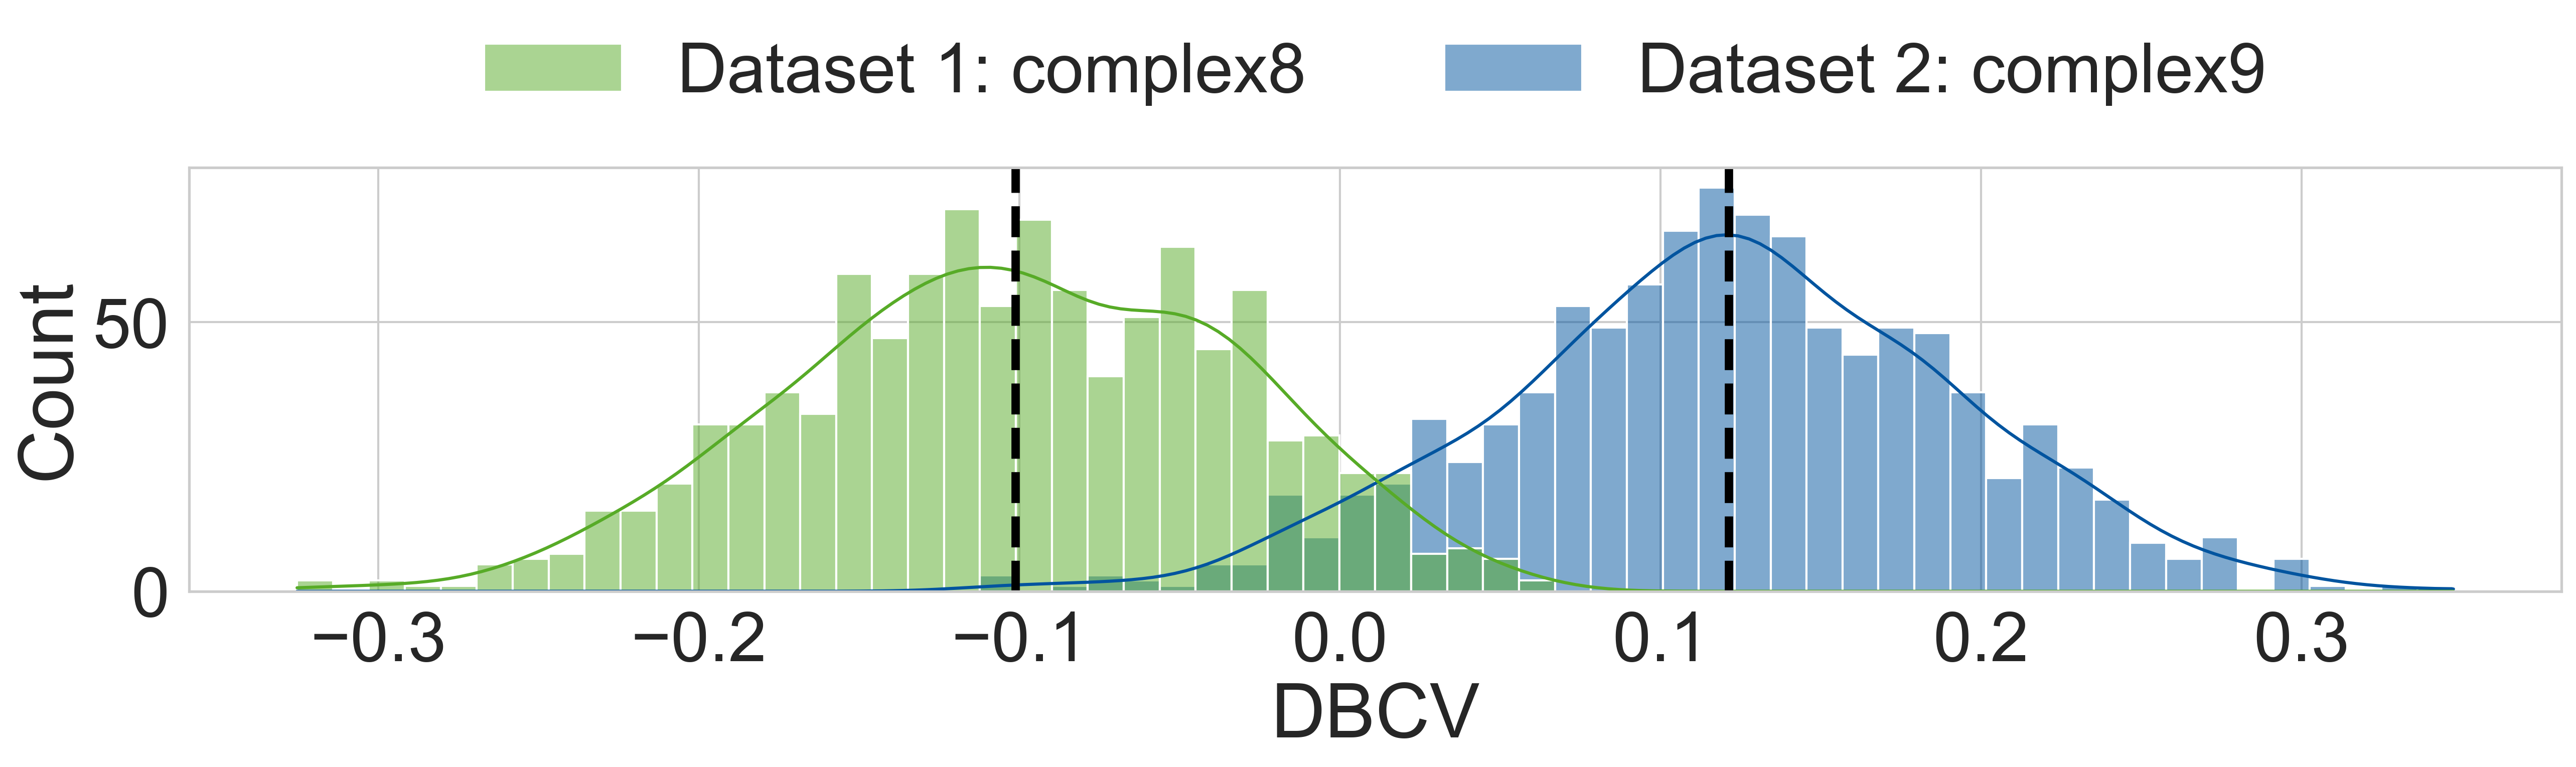

In [23]:
colors = {
'blue'       : '#00549F',
'blue_75'    : '#407FB7',
'blue_50'    : '#8EBAE5',
'blue_25'    : '#C7DDF2',
'blue_10'    : '#E8F1FA',

'black'      : '#000000',
'black_75'   : '#646567',
'black_50'   : '#9C9E9F',
'black_25'   : '#CFD1D2',
'black_10'   : '#ECEDED',

'magenta'    : '#E30066',
'magenta_75' : '#E96088',
'magenta_50' : '#F19EB1',
'magenta_25' : '#F9D2DA',
'magenta_10' : '#FDEEF0',

'yellow'     : '#FFED00',
'yellow_75'  : '#FFF055',
'yellow_50'  : '#FFF59B',
'yellow_25'  : '#FFFAD1',
'yellow_10'  : '#FFFDEE',

'petrol'     : '#006165',
'petrol_75'  : '#2D7F83',
'petrol_50'  : '#7DA4A7',
'petrol_25'  : '#BFD0D1',
'petrol_10'  : '#E6ECEC',

'turquoise'    : '#0098A1',
'turquoise_75' : '#00B1B7',
'turquoise_50' : '#89CCCF',
'turquoise_25' : '#CAE7E7',
'turquoise_10' : '#EBF6F6',

'green'      : '#57AB27',
'green_75'   : '#8DC060',
'green_50'   : '#B8D698',
'green_25'   : '#DDEBCE',
'green_10'   : '#F2F7EC',

'lime'       : '#BDCD00',
'lime_75'    : '#D0D95C',
'lime_50'    : '#E0E69A',
'lime_25'    : '#F0F3D0',
'lime_10'    : '#F9FAED',

'orange'     : '#F6A800',
'orange_75'  : '#FABE50',
'orange_50'  : '#FDD48F',
'orange_25'  : '#FEEAC9',
'orange_10'  : '#FFF7EA',

'red'        : '#CC071E',
'red_75'     : '#D85C41',
'red_50'     : '#E69679',
'red_25'     : '#F3CDBB',
'red_10'     : '#FAEBE3',

'bordeaux'   : '#A11035',
'bordeaux_75': '#B65256',
'bordeaux_50': '#CD8B87',
'bordeaux_25': '#E5C5C0',
'bordeaux_10': '#F5E8E5',

'purple'     : '#612158',
'purple_75'  : '#834E75',
'purple_50'  : '#A8859E',
'purple_25'  : '#D2C0CD',
'purple_10'  : '#EDE5EA',

'lila'       : '#7A6FAC',
'lila_75'    : '#9B91C1',
'lila_50'    : '#BCB5D7',
'lila_25'    : '#DEDAEB',
'lila_10'    : '#F2F0F7',
}

x = dbcv_complex8['DBCV']
y = dbcv_complex9['DBCV']

df = pd.concat(
    axis=0,
    ignore_index=True,
    objs=[
        pd.DataFrame.from_dict({"DBCV": x, "Dataset": "Dataset 1: complex8"}),
        pd.DataFrame.from_dict({"DBCV": y, "Dataset": "Dataset 2: complex9"}),
    ],
)

sns.set(font_scale=3)

# Create an array with the colors you want to use
colors = [colors['green'],colors['blue'], "#0098A1","#006165",]
# Set your custom color palette
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(
    data=df, x='DBCV', hue='Dataset', ax=ax, kde=True, bins=60
)
mean = dbcv_complex8['DBCV'].mean()
std = dbcv_complex8['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)

mean = dbcv_complex9['DBCV'].mean()
std = dbcv_complex9['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
fig.set_dpi(300)

plt.savefig("DBCV.pdf", dpi=300, format="pdf", bbox_inches="tight", pad_inches=0)